In [237]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")
import os
os.chdir(r'C:\Users\Hp\Downloads\Forecasting')

In [238]:
data=pd.read_csv("data_ap.csv") 
data.columns

Index(['Date', 'Confirmed'], dtype='object')

In [239]:
data=data.dropna()

In [240]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
logistic_function = lambda x, a, b, c, d: \
    a / (1 + np.exp(-c * (x - d))) + b

In [241]:
from statsmodels.tools.tools import add_constant
x = np.arange(len(confirmed))
x = add_constant(x)

In [242]:
confirmed = data['Confirmed']
confirmed = np.array(confirmed.astype('int64'))
x = x[:, 1]

In [243]:
(confirmed)

array([   1,    1,    1,    1,    1,    1,    1,    2,    3,    3,    5,
          7,    8,    9,   11,   12,   14,   19,   23,   40,   83,   86,
        132,  161,  190,  226,  266,  305,  348,  363,  381,  381,  432,
        473,  503,  534,  572,  603,  603,  722,  757,  813,  895,  955,
       1061, 1097, 1177, 1259], dtype=int64)

In [244]:
import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")
(a_, b_, c_, d_), _ = curve_fit(logistic_function, x, confirmed)

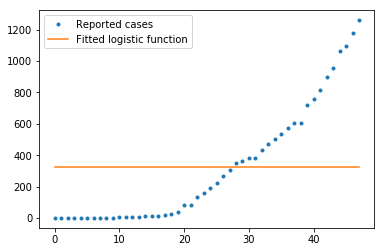

In [245]:
def plot_logistic_fit(confirmed, logistic_params):
    a_, b_, c_, d_ = logistic_params
    x = np.arange(0, len(confirmed))
    plt.plot(x, confirmed, ".", label="Reported cases")
    confirmed_pred = logistic_function(x, a_, b_, c_, d_)
    plt.plot(x, confirmed_pred, label="Fitted logistic function")
    plt.legend()
    plt.show()
    return confirmed_pred
confirmed_pred = plot_logistic_fit(confirmed, (a_, b_, c_, d_))